# Fundamentals of Digital Image Processing
### Integrated Theory and Practice using Python

This notebook introduces the fundamental concepts of digital image processing and demonstrates them using practical Python examples.

Topics covered:
- Digital images and basic properties
- Image formats
- Reading, displaying, and saving images
- Image formation, sampling, and quantization
- Resolution and pixel characteristics
- Colour spaces and colour space conversion
- Image histograms and histogram equalisation
- Image compression fundamentals
- Lossless and lossy compression

## Required Python Libraries

We use the following libraries throughout this notebook:
- OpenCV (`cv2`) for image processing
- NumPy for numerical operations
- Matplotlib for visualisation

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Digital Images and Basic Properties

A **digital image** is a numerical representation of a visual scene, stored as a two-dimensional array of pixel values.

Each image is characterised by:
- Spatial resolution (width × height)
- Number of channels (grayscale or colour)
- Bit depth (8-bit, 16-bit, etc.)
- Data type (uint8, uint16, float)

In [14]:
img = cv2.imread('foundation.jpg')

if img is None:
    print("Image not found. Please check the file path.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


### Inspecting Image Properties

Once an image is loaded, we can inspect its fundamental properties such as shape, data type, and number of channels.

In [15]:
print("Image shape:", img.shape)
print("Data type:", img.dtype)
print("Image size (total pixels):", img.size)
print("Number of channels:", img.shape[2] if len(img.shape) == 3 else 1)
print("Dimensions (height, width):", (img.shape[0], img.shape[1]))

Image shape: (630, 1174, 3)
Data type: uint8
Image size (total pixels): 2218860
Number of channels: 3
Dimensions (height, width): (630, 1174)


## Displaying Images

OpenCV loads images in **BGR** format, while Matplotlib expects **RGB** format.
Therefore, colour conversion is required before display.

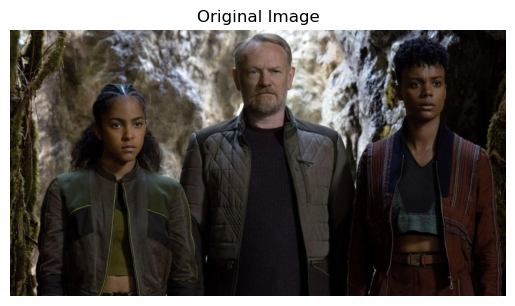

In [16]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

## Image Formats and Saving Images

Different image formats use different compression techniques.

- PNG → lossless compression
- JPEG → lossy compression

Saving the same image in different formats affects file size and visual quality.

In [17]:
cv2.imwrite("output.png", img)
cv2.imwrite("output_q10.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 10])
cv2.imwrite("output_q90.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 90])

True

## Image Formation, Sampling, and Quantization

Image formation involves capturing light using a lens and sensor system.
The continuous image is converted into a digital image through:

- **Sampling** – discretisation of spatial coordinates
- **Quantization** – discretisation of intensity values

For an 8-bit image:

$2^8 = 256 \text{ intensity levels}$



## Image Resolution and Pixel Characteristics

- Spatial resolution determines the level of detail
- Intensity resolution determines tonal precision
- Each pixel contains intensity or colour information

## Colour Spaces

A colour space defines how colour information is represented.

Common colour spaces:
- RGB – image acquisition and display
- HSV – colour-based segmentation
- HSI – human visual perception
- HSL – image editing applications

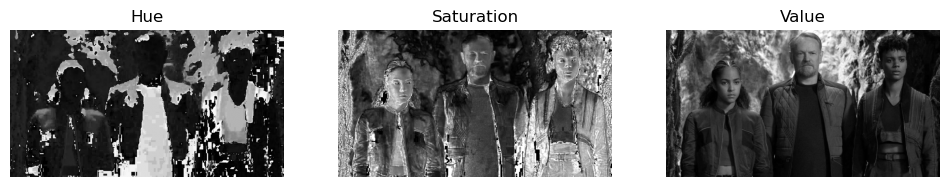

In [18]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(h, cmap='gray')
plt.title("Hue")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(s, cmap='gray')
plt.title("Saturation")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(v, cmap='gray')
plt.title("Value")
plt.axis("off")

plt.show()

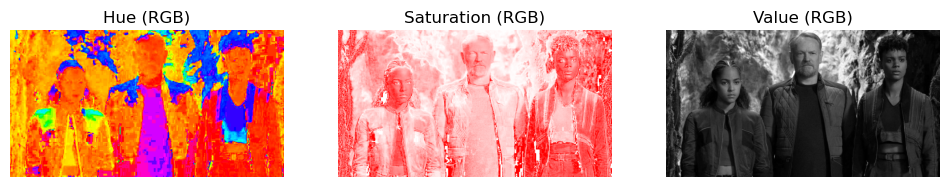

In [19]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# Create RGB visualizations for each HSV component
h_vis = cv2.cvtColor(cv2.merge([h, np.full_like(h, 255), np.full_like(h, 255)]), cv2.COLOR_HSV2RGB)
s_vis = cv2.cvtColor(cv2.merge([np.zeros_like(s), s, np.full_like(s, 255)]), cv2.COLOR_HSV2RGB)
v_vis = cv2.cvtColor(cv2.merge([np.zeros_like(v), np.zeros_like(v), v]), cv2.COLOR_HSV2RGB)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(h_vis)
plt.title("Hue (RGB)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(s_vis)
plt.title("Saturation (RGB)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(v_vis)
plt.title("Value (RGB)")
plt.axis("off")

plt.show()

## Image Histograms

An image histogram shows the distribution of pixel intensity values.

Histograms help analyse:
- Brightness
- Contrast
- Exposure

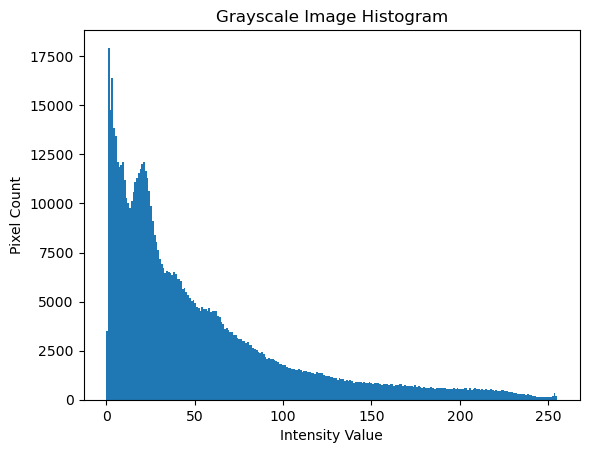

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.hist(gray.ravel(), bins=256)
plt.title("Grayscale Image Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.show()

## Histogram Equalisation

Histogram equalisation improves contrast by redistributing intensity values across the available range.

Note:
- Improves visibility in low-contrast images
- May amplify noise

### Purpose of Histogram Equalisation

Histogram equalisation is used to:

- **Enhance contrast** in images with poor visibility
- **Improve feature detection** by making edges and details more prominent
- **Correct underexposed or overexposed images** by redistributing intensities
- **Normalise lighting conditions** across different images for better comparison
- **Prepare images for further processing** such as segmentation or object detection

However, it may also:
- Amplify noise in smooth regions
- Over-enhance already well-contrasted images
- Alter the natural appearance of the image

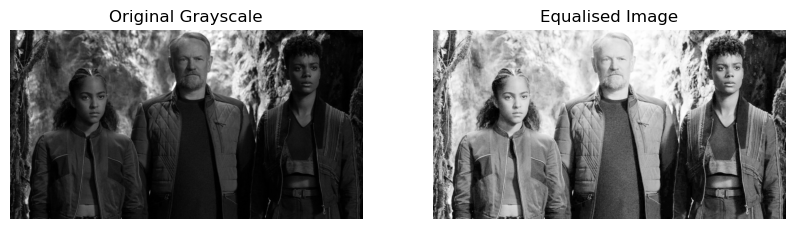

In [21]:
equalised = cv2.equalizeHist(gray)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(equalised, cmap='gray')
plt.title("Equalised Image")
plt.axis("off")

plt.show()

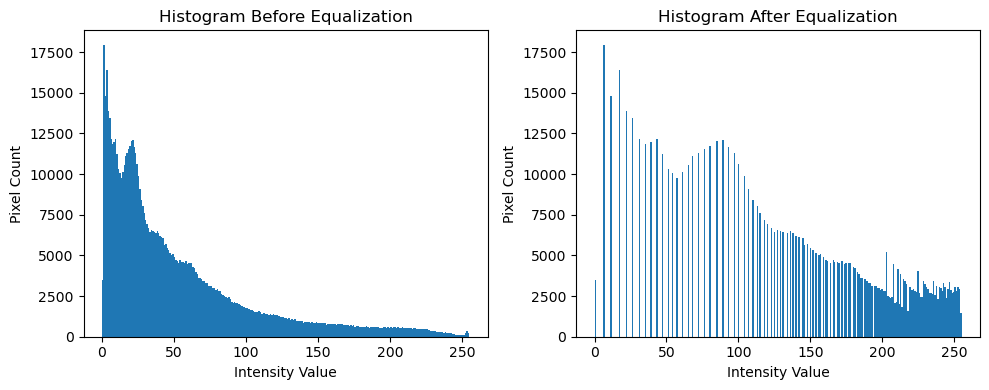

In [22]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(gray.ravel(), bins=256)
plt.title("Histogram Before Equalization")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")

plt.subplot(1, 2, 2)
plt.hist(equalised.ravel(), bins=256)
plt.title("Histogram After Equalization")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")

plt.tight_layout()
plt.show()

## Image Compression Fundamentals

Image compression reduces:
- Storage requirements
- Transmission bandwidth

Compression works by removing:
- Redundant information
- Perceptually insignificant information

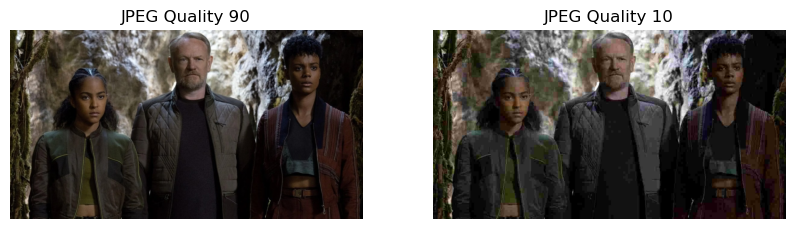

In [23]:
low_quality = cv2.imread("output_q10.jpg")
high_quality = cv2.imread("output_q90.jpg")

low_quality = cv2.cvtColor(low_quality, cv2.COLOR_BGR2RGB)
high_quality = cv2.cvtColor(high_quality, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(high_quality)
plt.title("JPEG Quality 90")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(low_quality)
plt.title("JPEG Quality 10")
plt.axis("off")

plt.show()

## Lossless vs Lossy Compression

**Lossless Compression**
- Exact reconstruction
- Lower compression ratio
- Example: PNG

**Lossy Compression**
- Approximate reconstruction
- Higher compression ratio
- Example: JPEG

Compression is always a trade-off between quality and efficiency.